# Assignment 4


## Problem Statement
You are standing on the first step of an infinitely long numbered path as shown below.

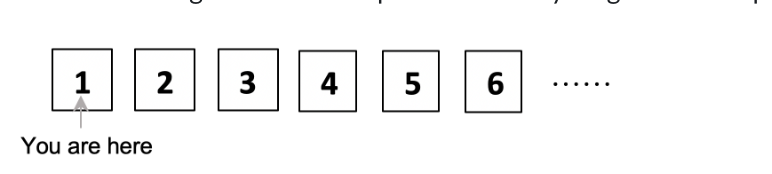

You have a fair coin which has the number 1 written on one side and the number 2 on the other. You throw the coin, and if it comes up N, you would then take N steps to the right.
For example, if you throw the coin and it comes up 2, you take 2 steps to the right to land on step number 3.
You now repeat the exercise, throwing the coin again and walking the number of steps that comes up on the coin. If you throw the coin 24 times, you are certain to have landed on, or past, step number 25.

What is the probability that at some point in this exercise you will land on step number 25?

## My Solution

After some other ideas, I realised that we can rephrase the problem as follows:

Let $p_k$ be the probability of landing in position $k$. Then we can say that $p_{k+2}=\frac{1}{2}(p_{k+1}+p_{k})$ subject to inital conditions $p_1=1$ and $p_2=1/2$. Solving this second order difference equation using the standard method from first year yields the solution

$$p_k=\frac{2}{3}(1-(-\frac{1}{2})^k)$$

So for our problem, $p_{25}=\frac{2}{3}(1+\frac{1}{2^{25}})$

In [3]:
# Theoretical solution

import numpy as np

def p(k):
  return 2/3*(1-np.power(-1/2,k))

p(1)
print(p(25))

x = 2/3*(1+np.power(1/2,25))
print(x)

0.6666666865348816
0.6666666865348816


In [4]:
# Simulation to check

# this code generates a game
k = []

from numpy import random

pos = 1
k.append(pos)

while pos < 26:

  x = random.binomial(n=1, p=0.5, size=1)[0] + 1

  pos += x

  k.append(pos)

print(k)


[1, 2, 4, 5, 6, 8, 10, 12, 14, 16, 18, 19, 21, 22, 23, 25, 27]


Mean: 0.6665789999999999
Variance: 0.00022610975899999979 



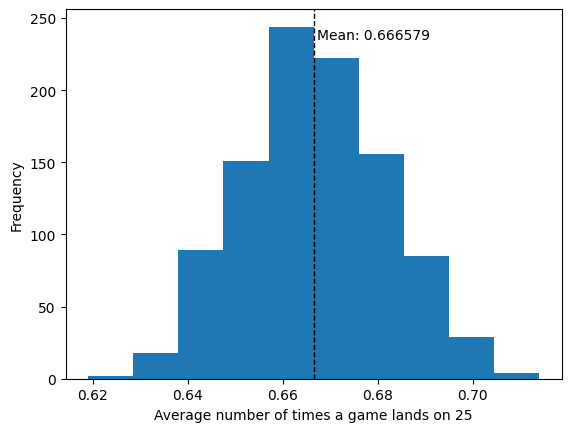

Mean: 0.66647
Variance: 0.00021274309999999995 



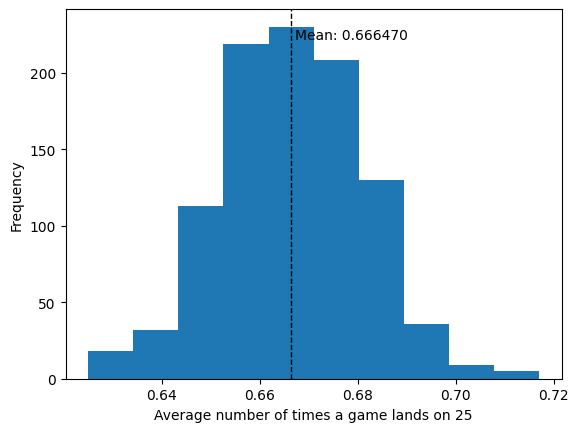

Mean: 0.6670949999999999
Variance: 0.000210593975 



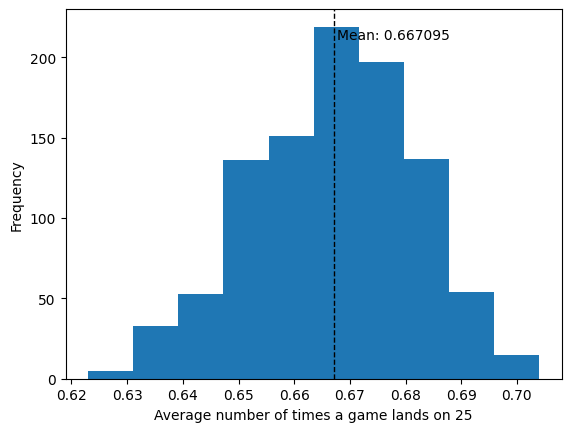

In [18]:
# lets make a function to run the game and see if we reach 25.
import matplotlib.pyplot as plt

def simulation(target, start, p, samples):
  success = 0
  for k in range(samples):
    pos = 1
    while pos < target + 1:

      x = random.binomial(n=1, p=0.5, size=1)[0] + 1

      pos += x

      if pos == target:
        success += 1

  return success/samples

def data(trials):
  data = []
  samples = 1000
  start = 1
  end = 25
  prob = 1/2
  for k in range(trials):
    data.append(simulation(end,start,prob,samples))

  print(f'Mean:',np.mean(data))
  print(f'Variance:',np.var(data),'\n')
  plt.hist(data, bins=int(samples/100))
  plt.axvline(np.mean(data), color='k', linestyle='dashed', linewidth=1)
  min_ylim, max_ylim = plt.ylim()
  plt.text(np.mean(data)*1.001, max_ylim*0.92, 'Mean: {:.6f}'.format(np.mean(data)))
  plt.xlabel("Average number of times a game lands on "+str(end))
  plt.ylabel("Frequency")
  plt.show()

data(1000)
data(1000)
data(1000)


## Extension

We need to compute the inverse of a complex 3x3 matrix, I sanity checked using this code.

In [17]:
from numpy.linalg import inv

lambda_p = -1/3 +1j*np.sqrt(2)/3
lambda_m = -1/3 -1j*np.sqrt(2)/3

M = np.matrix([[1, lambda_p, lambda_m], [1, np.power(lambda_p,2), np.power(lambda_m,2)], [1, np.power(lambda_p,3), np.power(lambda_m,3)]])
print("\nMatrix M")
print(M)
print("\nMatrix M^{-1}")
print(inv(M))

v = [1,1/3,4/9]
print()
print(inv(M)@v)

print(lambda_m)
print(lambda_p*lambda_p)


Matrix M
[[ 1.        +0.j         -0.33333333+0.47140452j -0.33333333-0.47140452j]
 [ 1.        +0.j         -0.11111111-0.31426968j -0.11111111+0.31426968j]
 [ 1.        +0.j          0.18518519+0.05237828j  0.18518519-0.05237828j]]

Matrix M^{-1}
[[ 0.16666667+5.55111512e-17j  0.33333333+1.11022302e-16j
   0.5       -1.11022302e-16j]
 [-0.58333333-4.71404521e-01j -0.66666667+8.24957911e-01j
   1.25      -3.53553391e-01j]
 [-0.58333333+4.71404521e-01j -0.66666667-8.24957911e-01j
   1.25      +3.53553391e-01j]]

[[ 0.5 +4.31753398e-17j -0.25-3.53553391e-01j -0.25+3.53553391e-01j]]
(-0.3333333333333333-0.47140452079103173j)
(-0.11111111111111116-0.3142696805273545j)
